## Cara menghitung PCA manual
Seperti yang sudah kita pelajari dari file .pdf yang diberikan, setelah mendapat intuisi mengenai apa itu reduksi dimensi dan algoritma reduksi dimensi yang paling banyak digunakan maka sekarang Kita akan mencoba untuk mengaplikasikan penggunaan PCA secara manual untuk dataset Wine.csv

In [1]:
# Panggil library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Panggil dataset
dataset = pd.read_csv('Wine.csv')
# Tunjukkan 5 data pertama dataset
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Dari data di atas kita bisa melihat kalau ada beberapa kolom yang membangun data tersebut. Sekarang kita akan menghitung jumlah kolom/fitur di atas.

In [2]:
# Lihat ukuran (baris, kolom) dari variabel dataset
dataset.shape

(178, 14)

Bagi data yang akan menjadi fitur dan yang akan menjadi label

In [3]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

Bagi data fitur dan label dengan menggunakan library sklearn.model_selection: train_test_split

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Lakukan feature scaling untuk data latih dan data uji

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Ukuran X_train
X_train.shape

(142, 13)

In [7]:
# Tampilan data latih yang sudah discaling
X_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

Ada beberapa cara yang bisa kita gunakan untuk mencari PCA secara manual. Secara umum ada dua cara, yaitu:
* Eigen Decomposition
* Singular Value Decomposition


Sebenarnya untuk mencari nilai PCA bisa kita lakukan dengan menggunakan library skelarn.decomposition:PCA. Namun alangkah baiknya jika kita memahami cara untuk melakukan penurunanya secara manual agar kita paham intuisi di balik reduksi dimensi.

**Eigen Decomposition**
<br>
Baik cara Eigen Decomposition dan SVD, keduanya memerlukan kita untuk melakukan centering dari data latih yang akan direduksi dimensinya. Cara melakukannya sangat simpel, cukup dengan menghitung rata-rata masing-masing fitur lalu dikurangi dengan setiap nilai fitur yang ada. Untuk setiap kolom $j=1,2,..,13$ dan $m$ adalah jumlah baris dari data $X_{train}$, yaitu 142.
<br>
\begin{equation}
M_{j}=\sum_{i=0}^{m}\frac{(X_{i,j})}{m}
\end{equation}
<br>
Hitung nilai center untuk setiap baris pada kolom-kolom yang ada
<br>
\begin{equation}
C_{i,j}=X_{i,j} - M_{j}
\end{equation}
<br>

In [8]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# Hitung nilai rata-rata untuk masing-masing kolom
M = mean(X_train.T, axis=1)
# Lakukan centering dengan mengurangi nilai kolom dengan nilai rata-rata yang diperoleh
C = X_train - M
print(C[0])

[ 0.87668336  0.79842885  0.64412971  0.12974277  0.48853231 -0.70326216
 -1.42846826  1.0724566  -1.36820277  0.35193216  0.0290166  -1.06412236
 -0.2059076 ]


Setelah mendapat nilai kolom yang sudah dicentering, langkah selanjutnya adalah menghitung matriks kovariansi nilai C, yaitu $A=covariance(C)$
<br>
\begin{equation}
A=\frac{\mathbf{C}^T\mathbf{C}}{m-1}
\end{equation}
<br>

In [9]:
# Hitung nilai covariance matrix dari centered matrix
# Cara hitung manual
# A = (C.T.dot(C)/C.shape[0]-1)
# Cara hitung covariance dengan menggunakan fungsi cov()
A = cov(C.T)
print(A[0])

[ 1.0070922   0.10158986  0.26809509 -0.27516974  0.23703425  0.31671433
  0.27851441 -0.10086553  0.1305509   0.57003979 -0.06801958  0.05747774
  0.62420905]


Lakukan eigendecomposition dari matriks kovariansi $A$ agar diperoleh nilai eigen dan vektornya. Jika diketahui $V$ adalah eigenvectors, $\lambda$ adalah eigenvalues, dan $I$ adalah matriks identitas dari matriks $A$.
<br>
\begin{equation}
AV=\lambda V
\end{equation}
\begin{equation}
(A-\lambda I)V= 0
\end{equation}
<br>
Dengan mengasumsikan nili $v$ adalah non-zero maka diketahui $A-\lambda I = 0$. Maka nilai $\lambda$ dapat dicari dengan rumus berikut:
\begin{equation}
|A-\lambda I|= 0
\end{equation}
<br>
Selanjutnya dengan menggunakan nilai eigenvalues $\lambda$ yang sudah diperoleh, hitung nilai eigenvectors $V$.


In [10]:
# eigendecomposition of covariance matrix
# pehitungan nilai eigenvalues dan eigenvectors dapat mudah dilakukan dengan menggunakan fungsi eig()
values, vectors = eig(A)
values

array([4.82894083, 2.52920254, 1.40778607, 0.97170248, 0.81772614,
       0.64269609, 0.53904343, 0.09124383, 0.16401706, 0.32677915,
       0.30227988, 0.22672631, 0.24405475])

In [11]:
vectors[0]

array([ 0.12959991, -0.49807323,  0.1383815 , -0.24199813, -0.17279973,
       -0.17873289, -0.09000534, -0.08850175, -0.26402263,  0.48169166,
       -0.43303897,  0.2793571 ,  0.11125519])

Dengan menggunakan nilai eigenvectors $V$ yang sudah diperoleh maka kita akan memproyeksikan nilai $C$ ke dalam bidang baru. Untuk menentukan jumlah kolom $n$ hasil reduksi dimensi, maka kita harus memfilter jumlah kolom dari nilai eigenvectors $V$.

In [12]:
# n adalah jumlah kolom yang akan dipertahankan 
n = 2
# project data
P = vectors[:,:n].T.dot(C.T)
# fitur dari X_{train} yang sudah direduksi dimensinya
P.T

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

Jika cara di atas sudah kita pahami, maka sekarang kita akan mencoba cara yang sama dengan menggunakan Singular Value Decomposition.
<br>
<br>
**Singular Value Decomposition**
<br>
Dengan mengasumsikan nilai $C$ yang sudah dihitung di atas adalah sama untuk kasus SVD maka langkah tersebut akan diskip. Nilai SVD dari $C$ akan mendekomposisi matriks $C$ menjadi perkalian dari tiga buah matriks $U \Sigma V_{t}$:
<br>
<br>
\begin{equation}
C=U \Sigma V_{t}
\end{equation}
<br>
Di mana $V_{t}$ berisikan unit vektor yang mendefinisikan semua principal component yang kita cari.

In [13]:
# Hitung tiga matriks U, Sigma, dan V_{t} dengan menggunakan fungsi svd()
U, s, Vt = np.linalg.svd(C)

In [14]:
U[0]

array([ 0.08350084,  0.05677645, -0.00515055, -0.00726556, -0.10249886,
        0.053176  , -0.11711607,  0.01996528,  0.07023893, -0.04043115,
        0.02248334, -0.01643006, -0.12664126, -0.12649635,  0.00859837,
       -0.06708685, -0.03878235, -0.11636508, -0.07416571,  0.116493  ,
       -0.04273684, -0.00813397, -0.07032846, -0.03769567, -0.06623698,
       -0.03551719,  0.04798828,  0.0144815 ,  0.08971387,  0.03972568,
       -0.02113107, -0.08546711,  0.02599952,  0.00705455,  0.0564083 ,
        0.05459768, -0.00142055, -0.077229  ,  0.15932931, -0.02977255,
       -0.00318249, -0.04731033,  0.24555686,  0.11919727,  0.12865881,
       -0.06567824,  0.04718453,  0.05880508,  0.00181925,  0.09168776,
        0.02745573,  0.07826792,  0.20258853,  0.04942294, -0.06325643,
       -0.07147905,  0.00771899, -0.11684869,  0.05198826, -0.01625879,
       -0.05729915, -0.10934075, -0.11128849,  0.08251754, -0.10106688,
        0.09839066,  0.02652841, -0.1439647 , -0.04539039,  0.08

In [15]:
s

array([26.09369   , 18.88432045, 14.08892602, 11.7051292 , 10.73775516,
        9.5194616 ,  8.71809177,  6.78792016,  6.52851154,  5.86615037,
        5.65406131,  4.80899217,  3.58683432])

In [16]:
Vt[0]

array([-0.12959991,  0.24464064,  0.01018912,  0.24051579, -0.12649451,
       -0.38944115, -0.42757808,  0.30505669, -0.30775255,  0.11027186,
       -0.30710508, -0.37636185, -0.2811085 ])

Tentukan jumlah kolom $n$ hasil reduksi dimensi dari $V_{t}$, di mana hasil proyeksi dari proses reduksi dimensi dinyakan sebagai $X_{d}$ dan $W_{d}$ menyatakan jumlah kolom pertama $n$ dari $V_{t}$.
<br>
<br>
\begin{equation}
X_{d}=CW_{d}
\end{equation}
<br>

In [17]:
# n adalah jumlah kolom yang akan dipertahankan 
n = 2
# project data
W_d = Vt.T[:,:n]
X_d = C.dot(W_d)
X_d

array([[ 2.17884511e+00,  1.07218467e+00],
       [ 1.80819239e+00, -1.57822344e+00],
       [-1.09829474e+00, -2.22124345e+00],
       [ 2.55584748e+00,  1.66210369e+00],
       [-1.85698063e+00, -2.41573166e-01],
       [-2.58288576e+00,  1.37668170e+00],
       [-8.72876119e-01, -2.25618512e+00],
       [ 4.18384029e-01, -2.35415681e+00],
       [ 3.04977245e-01, -2.27659433e+00],
       [-2.14082532e+00,  1.10052871e+00],
       [ 2.98136465e+00,  2.47159183e-01],
       [-1.96188242e+00, -1.25407738e+00],
       [ 2.16177795e+00,  9.75966550e-01],
       [-2.21976084e+00,  2.39507167e+00],
       [ 2.30179529e+00,  2.05791962e-01],
       [ 3.00953827e+00,  2.79141212e-01],
       [-2.63443473e+00,  8.68313119e-01],
       [ 1.09219965e+00,  3.53906625e+00],
       [-2.62578435e+00,  2.96852840e-03],
       [-1.98077342e-01, -2.29193443e+00],
       [ 2.67442753e+00,  2.58800132e+00],
       [ 2.54763698e+00,  4.52703891e-01],
       [-1.77416736e+00, -8.43586940e-01],
       [ 2.

Lihat hasilnya sama dengan yang menggunakan cara Eigen Decomposition. Sekarang kita akan bandingkan kedua hasil di atas dengan penggunaan library sklearn.decomposition: PCA

**Cara Sklearn**
<br>
Dengan menggunakan sklearn, cara panjang di atas dapat dipersingkat menjadi satu buah line of code saja

In [18]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
dataset.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [21]:
# Applying PCA
from sklearn.decomposition import PCA
# selain memasukkan jumlah, bisa juga dimasukkan jumlah persen cummulative sum saja, nilainya antara 0 sampai 1
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

Cara untuk menentukan jumlah komponen yang diperlukan dengan menghitung cummulative sum

In [22]:
#print(pca.explained_variance_) 
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.cumsum()) 

[0.36884109 0.19318394]
[0.36884109 0.56202504]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


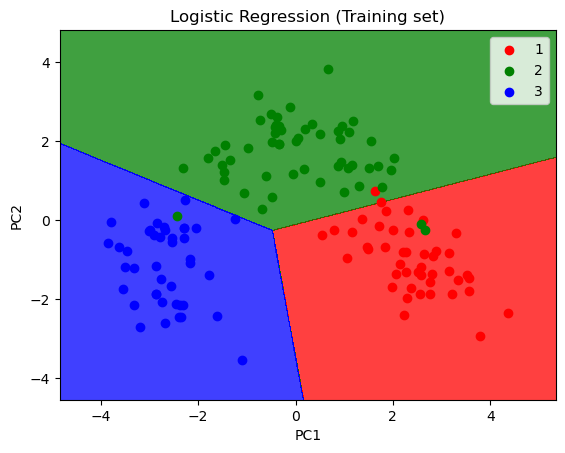

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


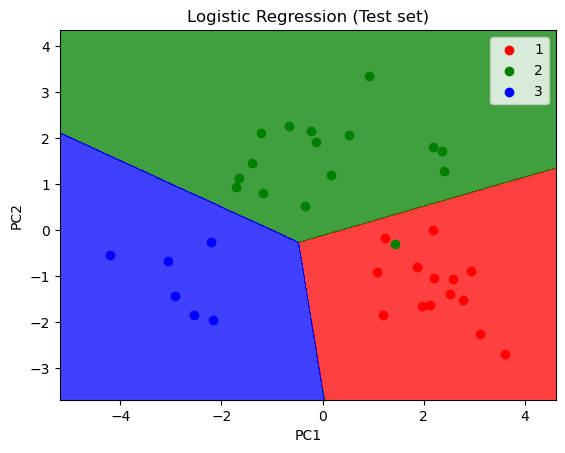

In [23]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Dari hasil di atas kita sudah melihat suatu data yang memiliki banyak kolom dapat kita reduksi jumlah kolomnya sehingga menjadi lebih mudah untuk dilakukan proses klasifikasi serta membantu juga untuk proses visualisasinya.

## Kernel PCA

In [24]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [25]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

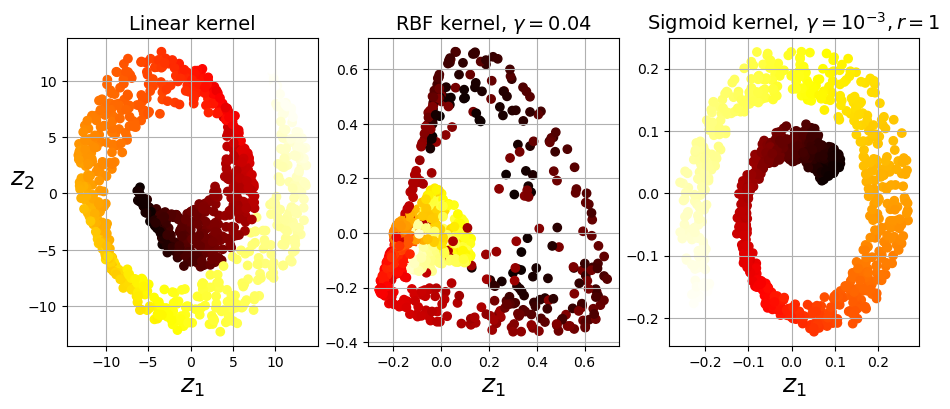

In [26]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [27]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.01, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.01      , 0.01444444, 0.01888889, 0.02333333, 0.02777778,
       0.03222222, 0.03666667, 0.04111111, 0.04555556, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [28]:
print(grid_search.best_params_)

{'kpca__gamma': 0.04555555555555556, 'kpca__kernel': 'rbf'}


In [29]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766104